In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import r2_score,accuracy_score

In [3]:
c = pd.read_csv(r'C:\Users\mehdi\Downloads\processed.cleveland.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})
h = pd.read_csv(r'C:\Users\mehdi\Downloads\processed.hungarian.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})

s = pd.read_csv(r'C:\Users\mehdi\Downloads\processed.switzerland.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})

v = pd.read_csv(r'C:\Users\mehdi\Downloads\processed.va.data',names=["age", "sex", "cp",
                                                         "trestbps","chol","fbs",
                                                         "restecg","thalach","exang",
                                                         "oldpeak","slope","ca","thal","num"], 
                            header=None,dtype={'continent':'category'})

In [4]:
frames = [c, h, s, v]

In [85]:
heart_disease = pd.concat(frames)

In [81]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB


In [86]:
heart_disease = heart_disease.apply(pd.to_numeric, errors='coerce')

In [87]:
heart_disease = heart_disease.fillna(heart_disease.mean())

<AxesSubplot:>

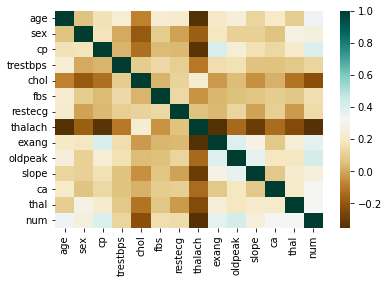

In [109]:
sns.heatmap(heart_disease.corr(),cmap="BrBG",annot=False)

In [129]:
upper_tri = X.where(np.triu(np.ones(X.shape),k=1).astype(np.bool))
print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] < 0.40)]
print(); print(to_drop)

     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    NaN  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    NaN  NaN  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    NaN  NaN  NaN     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    NaN  NaN  NaN       NaN  250.0  0.0      0.0    187.0    0.0      3.5   
4    NaN  NaN  NaN       NaN    NaN  0.0      2.0    172.0    0.0      1.4   
..   ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
195  NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
196  NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
197  NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
198  NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   
199  NaN  NaN  NaN       NaN    NaN  NaN      NaN      NaN    NaN      NaN   

     slope   ca  thal  
0      3.0  0.0   6.0  
1      2.0  3.0

In [132]:
lis=['fbs', 'restecg', 'exang', 'ca']


In [134]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.000000,233.0,1.0,2.0,150.000000,0.000000,2.300000,3.000000,0.000000,6.000000,0
1,67.0,1.0,4.0,160.000000,286.0,0.0,2.0,108.000000,1.000000,1.500000,2.000000,3.000000,3.000000,2
2,67.0,1.0,4.0,120.000000,229.0,0.0,2.0,129.000000,1.000000,2.600000,2.000000,2.000000,7.000000,1
3,37.0,1.0,3.0,130.000000,250.0,0.0,0.0,187.000000,0.000000,3.500000,3.000000,0.000000,3.000000,0
4,41.0,0.0,2.0,130.000000,204.0,0.0,2.0,172.000000,0.000000,1.400000,1.000000,0.000000,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.000000,0.000000,1.770867,0.676375,5.087558,1
196,62.0,1.0,1.0,132.132404,139.0,0.0,1.0,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0
197,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,1.770867,0.676375,6.000000,2
198,58.0,1.0,4.0,132.132404,385.0,1.0,2.0,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0


In [133]:
for i in lis:
    heart_disease=heart_disease.drop(lis,inplace=True)



KeyError: "['fbs' 'restecg' 'exang' 'ca'] not found in axis"

In [88]:
from sklearn.model_selection import train_test_split,KFold
X = heart_disease.iloc[:, :-1]
y = heart_disease['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [89]:
from sklearn.preprocessing import StandardScaler



In [90]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [91]:
from skfeature.function.similarity_based import fisher_score

In [92]:
def feature_ranking(score):
    """
    Rank features in descending order according to fisher score, the larger the fisher score, the      more important the
    feature is
    """
    idx = np.argsort(score, 0)
    return idx[::-1]

In [32]:
kf=KFold(n_splits=10,shuffle=True)
ss=kf.split(X_train)
n_samples, n_features = X_train.shape
num_fea = 5

In [93]:
score=fisher_score.fisher_score(X_train,y_train)

c:\users\mehdi\appdata\local\programs\python\python38\lib\site-packages\skfeature\utility\construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = class_idx[:, np.newaxis] & class_idx[np.newaxis, :]


In [94]:
print(score)

[10  4  5  3 12  0  1 11  8  2  7  6  9]


In [98]:
idx=feature_ranking(score)
idx

array([ 4,  7,  0, 12,  8, 10, 11,  2,  1,  3,  9,  6,  5], dtype=int64)

In [20]:
for train,test in ss:
    clf=SVR()
    score=fisher_score.fisher_score(X_train[train],y_train[train])
    
    idx=feature_ranking(score)
    
    selected_feature=X_train[:, idx[0:num_fea]]
    
    clf.fit(selected_feature[train],y_train[train])
    
    y_predict = clf.predict(selected_feature[test])
    
    acc = r2_score(y_train[test], y_predict)
    cv_models.append({
        "model": clf,
        "score": acc,
        "best_features": idx[0:num_fea]
    })

In [103]:
selected_fiteaure=X_train[:,idx[0:5]]
selected_fiteaure_x=X_test[:,idx[0:5]]


In [104]:
clf=SVR(kernel='rbf')

In [105]:
clf.fit(selected_fiteaure,y_train)

SVR()

In [106]:
y_predict=clf.predict(selected_fiteaure_x)

In [107]:
print(r2_score(y_test,y_predict))

0.3023824114986574


In [110]:
from sklearn.naive_bayes import GaussianNB,CategoricalNB,ComplementNB,MultinomialNB

In [119]:
nb_clf=GaussianNB()

In [120]:
nb_clf.fit(X_train,y_train)

GaussianNB()

In [121]:
y_pred=nb_clf.predict(X_test)

In [122]:
print(r2_score(y_test,y_pred))

0.1511279091174912


In [123]:
X_train

array([[-1.63556098,  0.51982397,  0.79392459, ...,  2.42003442,
         0.02613236,  0.0131205 ],
       [-0.57749843,  0.51982397,  0.79392459, ...,  0.4547953 ,
        -1.20931228,  1.42992212],
       [-0.15427341,  0.51982397,  0.79392459, ...,  0.00449501,
         0.02613236,  0.0131205 ],
       ...,
       [ 0.48056412,  0.51982397, -0.28020868, ...,  0.00449501,
         0.02613236,  0.0131205 ],
       [ 0.48056412,  0.51982397,  0.79392459, ...,  0.00449501,
         0.02613236,  0.0131205 ],
       [ 0.79798289,  0.51982397,  0.79392459, ...,  0.4547953 ,
         0.02613236,  1.42992212]])

In [124]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.000000,233.0,1.0,2.0,150.000000,0.000000,2.300000,3.000000,0.000000,6.000000,0
1,67.0,1.0,4.0,160.000000,286.0,0.0,2.0,108.000000,1.000000,1.500000,2.000000,3.000000,3.000000,2
2,67.0,1.0,4.0,120.000000,229.0,0.0,2.0,129.000000,1.000000,2.600000,2.000000,2.000000,7.000000,1
3,37.0,1.0,3.0,130.000000,250.0,0.0,0.0,187.000000,0.000000,3.500000,3.000000,0.000000,3.000000,0
4,41.0,0.0,2.0,130.000000,204.0,0.0,2.0,172.000000,0.000000,1.400000,1.000000,0.000000,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.000000,333.0,1.0,1.0,154.000000,0.000000,0.000000,1.770867,0.676375,5.087558,1
196,62.0,1.0,1.0,132.132404,139.0,0.0,1.0,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0
197,55.0,1.0,4.0,122.000000,223.0,1.0,1.0,100.000000,0.000000,0.000000,1.770867,0.676375,6.000000,2
198,58.0,1.0,4.0,132.132404,385.0,1.0,2.0,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0
